<a href="https://colab.research.google.com/github/jcandane/StochasticPhysics/blob/main/RDF_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import tikzplotlib
except:
    !pip install tikzplotlib
    import tikzplotlib

from scipy import fft

π=np.pi

### another paper
# https://journals.aps.org/pra/pdf/10.1103/PhysRevA.7.2130


In [2]:
## https://www.pnas.org/doi/pdf/10.1073/pnas.78.11.6588

data = np.array([[2.6, 0.238],
[2.7, 0.241],
[2.8, 0.245],
[2.9, 0.251],
[3.0, 0.265],
[3.1, 0.300],
[3.2, 0.381],
[3.3, 0.552],
[3.4, 0.858],
[3.5, 1.326],
[3.6, 1.918],
[3.7, 2.514],
[3.8, 2.939],
[3.9, 3.045],
[4.0, 2.792],
[4.1, 2.276],
[4.2, 1.669],
[4.3, 1.130],
[4.4, 0.743],
[4.5, 0.517],
[4.6, 0.415],
[4.7, 0.391],
[4.8, 0.413],
[4.9, 0.463],
[5.0, 0.531],
[5.1, 0.607],
[5.2, 0.684],
[5.3, 0.752],
[5.4, 0.802],
[5.5, 0.830],
[5.6, 0.839],
[5.7, 0.836],
[5.8, 0.835],
[5.9, 0.847],
[6.0, 0.882],
[6.1, 0.944],
[6.2, 1.028],
[6.3, 1.126],
[6.4, 1.222],
[6.5, 1.303],
[6.6, 1.356],
[6.7, 1.374],
[6.8, 1.356],
[6.9, 1.307],
[7.0, 1.235],
[7.1, 1.153],
[7.2, 1.072],
[7.3, 1.002],
[7.4, 0.947],
[7.5, 0.911],
[7.6, 0.892],
[7.7, 0.887],
[7.8, 0.893],
[7.9, 0.905],
[8.0 ,0.920],
[8.1 ,0.936],
[8.2, 0.950],
[8.3, 0.963],
[8.4, 0.973],
[8.5, 0.980],
[8.6, 0.983],
[8.7, 0.984],
[8.8, 0.982],
[8.9, 0.978],
[9.0, 0.973],
[9.1, 0.969],
[9.2, 0.965],
[9.3, 0.965],
[9.4 ,0.968],
[9.5, 0.975],
[9.6, 0.985],
[9.7, 0.999],
[9.8, 1.013],
[9.9, 1.029],
[10.0, 1.043],
[10.1, 1.055],
[10.2, 1.063],
[10.3, 1.068],
[10.4, 1.068],
[10.5, 1.054],
[10.6, 1.057],
[10.7, 1.046],
[10.8, 1.035],
[10.9, 1.022],
[11.0, 1.010],
[11.1, 1.000],
[11.2, 0.991],
[11.3, 0.984],
[11.4, 0.980],
[11.5, 0.977],
[11.6, 0.977],
[11.7, 0.978],
[11.8, 0.980],
[11.9, 0.983],
[12.0, 0.986],
[12.1, 0.989],
[12.2, 0.992],
[12.3, 0.995],
[12.4, 0.998],
[12.5, 1.001],
[12.6, 1.004],
[12.7, 1.006],
[12.8, 1.010],
[12.9, 1.013],
[13.0, 1.016],
[13.1, 1.020],
[13.2, 1.023],
[13.3, 1.027],
[13.4, 1.030],
[13.5, 1.033],
[13.6, 1.035],
[13.7, 1.036],
[13.8, 1.037],
[13.9, 1.036],
[14.0, 1.035],
[14.1, 1.033],
[14.2, 1.031],
[14.3, 1.027],
[14.4, 1.024],
[14.5, 1.019],
[14.6, 1.015],
[14.7, 1.011],
[14.8, 1.007],
[14.9, 1.003],
[15.0, 1.000]])

#data[:,1] -= data[0,1] ## lower RDF to g(R)=0 axis

x = np.arange(0.0, data[0,0], 0.1)
data = np.concatenate( (np.asarray([x,np.zeros(len(x))]).T, data), axis=0)

r = np.logspace(0.01, 4, 50, endpoint=True, base=3)
print(r)

[ 1.01104669  1.10566233  1.20913228  1.32228515  1.44602706  1.58134898
  1.72933458  1.89116895  2.06814807  2.26168924  2.47334235  2.70480236
  2.95792282  3.23473078  3.53744294  3.86848347  4.23050339  4.62640181
  5.05934915  5.53281251  6.05058346  6.61680838  7.23602169  7.91318215
  8.65371254  9.46354315 10.34915923 11.31765292 12.37678006 13.53502229
 14.80165501 16.18682158 17.70161464 19.35816486 21.16973815 23.15084187
 25.31734097 27.68658512 30.27754756 33.11097712 36.20956432 39.59812311
 43.30378957 47.35623923 51.78792472 56.63433563 61.93428274 67.73020881
 74.0685285  81.        ]


In [3]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(data[:,0], data[:,1])

r   = np.logspace(-7, np.log10(15), 1024, base=10)
g_r = cs(r)
#r

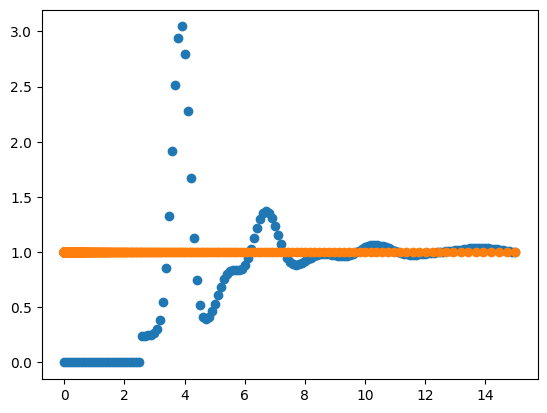

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.scatter( r, np.ones(len(r)))
plt.show()

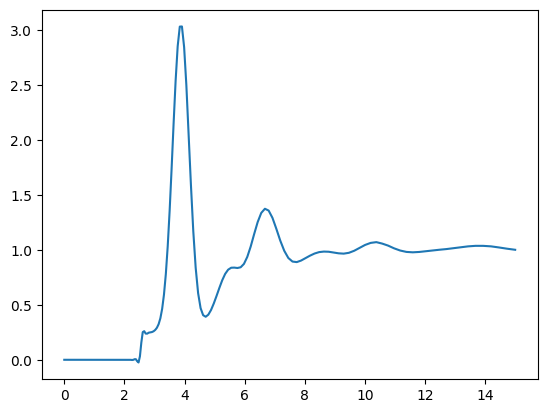

In [5]:
plt.plot(r, g_r)
tikzplotlib.save("asf.tex")
plt.show()

In [6]:
mu     = 0.5                     # Order mu of Bessel function
#r      = np.logspace(-7, 1, 128)  # Input evaluation points
dln    = np.log(r[1]/r[0])      # Step size
offset = fft.fhtoffset(dln, initial=-6*np.log(10), mu=mu)
k      = np.exp(offset)/r[::-1]   # Output evaluation points

fht = fft.fht(g_r, dln, mu=mu, offset=offset)

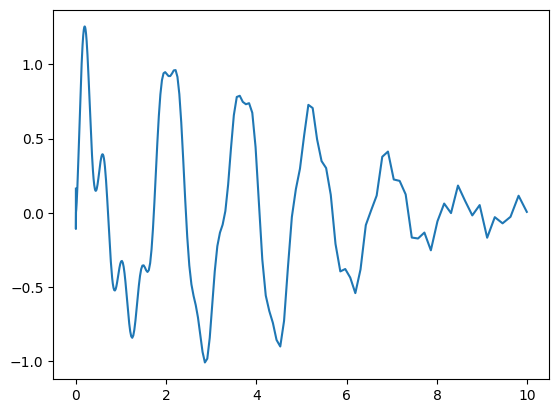

In [7]:
plt.plot(k, fht)
plt.show()

In [8]:
try:
    g_r = np.load("g_r.npy")
except:
    !wget https://github.com/jcandane/StochasticPhysics/raw/main/g_r.npy
    g_r = np.load("g_r.npy")

try:
    S_q = np.load("S_q.npy")
except:
    !wget https://github.com/jcandane/StochasticPhysics/raw/main/S_q.npy
    S_q = np.load("S_q.npy")

--2024-03-20 15:54:34--  https://github.com/jcandane/StochasticPhysics/raw/main/g_r.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jcandane/StochasticPhysics/main/g_r.npy [following]
--2024-03-20 15:54:35--  https://raw.githubusercontent.com/jcandane/StochasticPhysics/main/g_r.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6528 (6.4K) [application/octet-stream]
Saving to: ‘g_r.npy’

g_r.npy             100%[===================>]   6.38K  --.-KB/s    in 0s      

2024-03-20 15:54:35 (52.5 MB/s) - ‘g_r.npy’ saved [6528/6528]

--2024-03-20 15:54:35--  https://github.com/jcandane/Stochasti

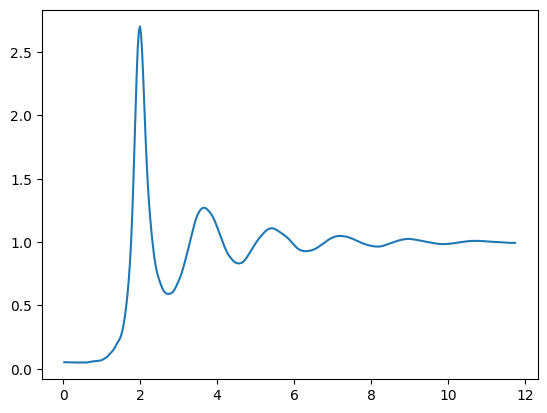

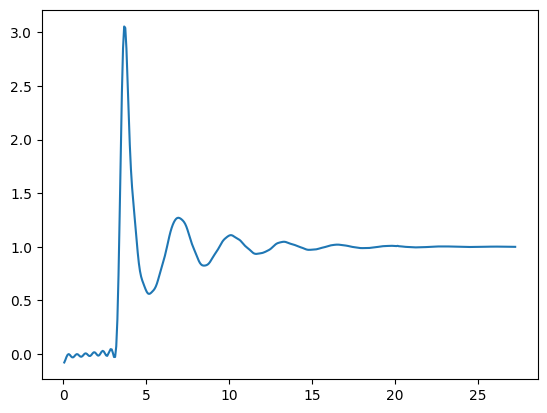

In [17]:
plt.plot(S_q[:,0], S_q[:,1])
plt.show()

plt.plot(g_r[:,0], g_r[:,1])
plt.show()

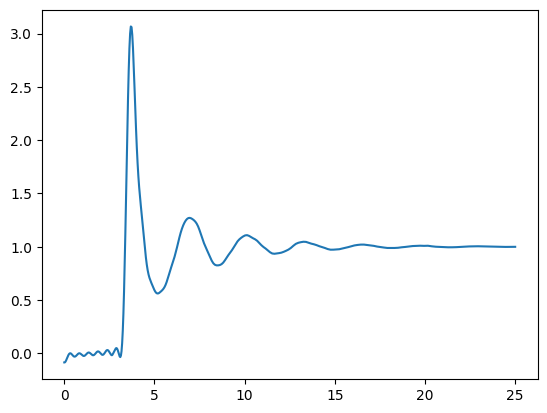

In [149]:
from scipy.interpolate import CubicSpline

def g(r):
    cs = CubicSpline(g_r[:,0], g_r[:,1])
    return cs(r)

r   = np.logspace(-7, np.log10(25), 1800, base=10)
plt.plot(r, g(r))
plt.show()

In [25]:
cs = CubicSpline(g_r[:,0], g_r[:,1])

N   = 12380
r   = np.logspace(-7, np.log10(15), N, base=10)
G_r = cs(r)

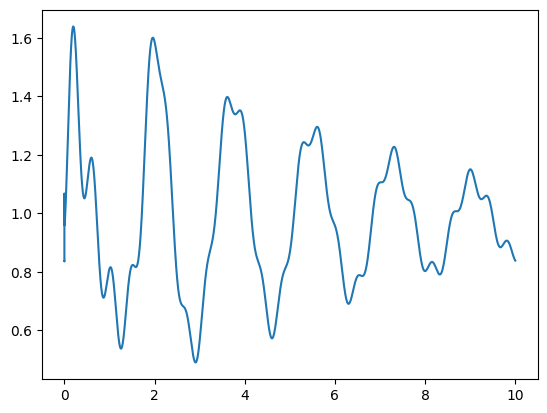

In [26]:
mu     = 0.5                     # Order mu of Bessel function
#r      = np.logspace(-7, 1, 128)  # Input evaluation points
dln    = np.log(r[1]/r[0])      # Step size
offset = fft.fhtoffset(dln, initial=-6*np.log(10), mu=mu)
k      = np.exp(offset)/r[::-1]   # Output evaluation points

fht = fft.fht(G_r, dln, mu=mu, offset=offset)

plt.plot(k, 1 + 0.5*fht)
#plt.plot(S_q[:,0], fht)
plt.show()

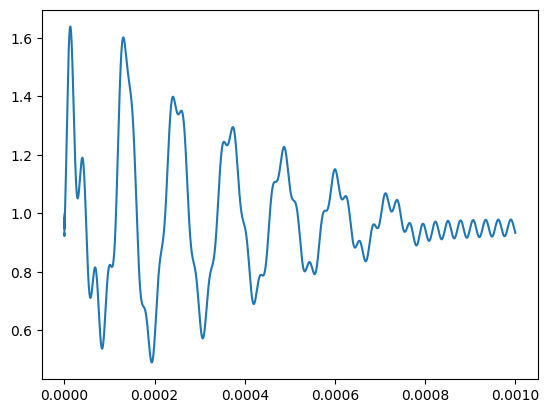

In [29]:
cs = CubicSpline(g_r[:,0], g_r[:,1])

N   = 12380
r   = np.logspace(-3, np.log10(15), N, base=10)
G_r = cs(r)

mu     = 0.5                     # Order mu of Bessel function
#r      = np.logspace(-7, 1, 128)  # Input evaluation points
dln    = np.log(r[1]/r[0])      # Step size
offset = fft.fhtoffset(dln, initial=-6*np.log(10), mu=mu)
k      = np.exp(offset)/r[::-1]   # Output evaluation points

fht = fft.fht(G_r, dln, mu=mu, offset=offset)

plt.plot(k, 1 + 0.5*fht)
#plt.plot(S_q[:,0], fht)
plt.show()

chatgpt's hankel

In [22]:
import numpy as np
from scipy.integrate import quad
from scipy.special import jn

def hankel_transform(f, k, n=0):
    """
    Compute the n-th order Hankel transform of function f at frequency k.

    Parameters:
    - f: The function to transform. It should take a single argument (radial distance).
    - k: The frequency at which to evaluate the transform.
    - n: The order of the Bessel function (default is 0).

    Returns:
    - The value of the Hankel transform of f at frequency k.
    """
    # Define the integrand function
    def integrand(r):
        return r * f(r) * jn(n, k*r)

    # Perform numerical integration
    result, _ = quad(integrand, 0, np.inf)
    return result

# Example function f(r)
def example_function(r):
    return np.exp(-r**2)

# Compute the Hankel transform of the example function at a specific frequency
k_value = 1.0  # Frequency
transformed_value = hankel_transform(example_function, k_value, n=0)

print(f"Hankel transform at k={k_value}: {transformed_value}")

Hankel transform at k=1.0: 0.38940039153570083


https://mattermodeling.stackexchange.com/questions/8838/how-to-calculate-a-structure-factor-from-a-radial-distribution-function

https://www.math.arizona.edu/~faris/methodsweb/hankel.pdf


In [12]:
r_g = np.prod( g_r , axis=1)

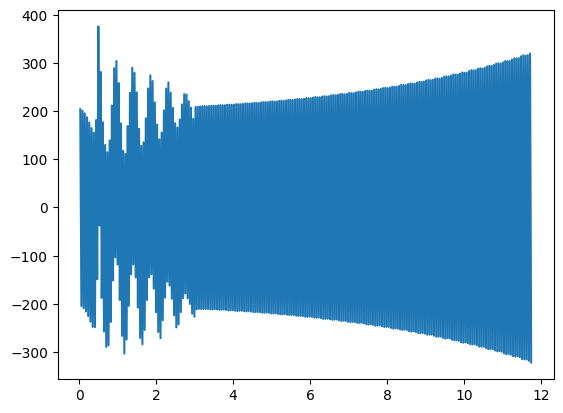

In [13]:
import scipy



plt.plot(S_q[:,0], scipy.fftpack.dst(r_g)*S_q[:,0])
plt.show()

In [116]:
-6*np.log(10), r[0], np.log(10)*-6 - offset

(-13.815510557964275, 1e-07, 0.020823587468452587)

## scipy fht example

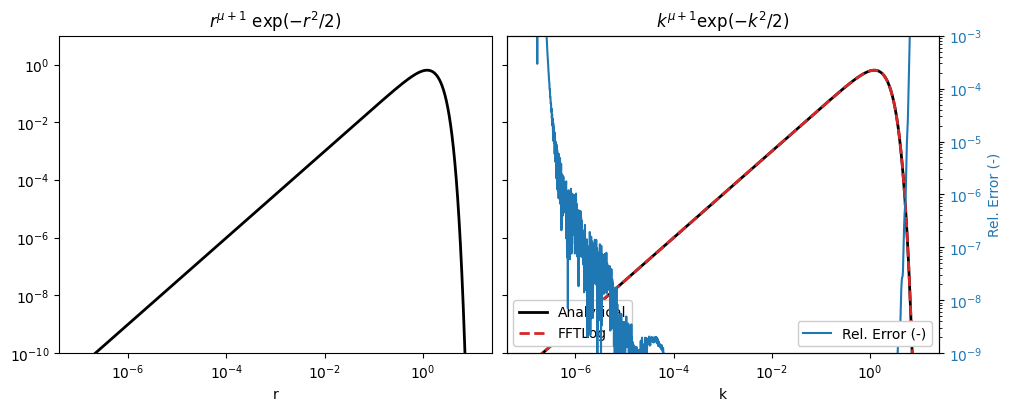

In [142]:
rmin = -7 ## log-base 10
rmax =  1 ## log-base 10
base = 10
N    = 1400  # number of points
μ    = 0.5  # Order mu of Bessel function

#################

def f(x, mu):
    """Analytical function: x^(mu+1) exp(-x^2/2)."""
    return x**(mu + 1)*np.exp(-x**2/2)

#################

r      = np.logspace(rmin, rmax, N, base=base)  # Input evaluation points
δ      = np.log(r[1]/r[0])      # Step size
offset = fft.fhtoffset( δ, initial=(rmin+rmax)*np.log(base), mu=μ )
k      = np.exp(offset)/np.flip(r)   # Output evaluation points

a_r = f(r, μ)
fht = fft.fht(a_r, δ, mu=μ, offset=offset, bias=0.)

a_k = f(k, μ)
rel_err = abs((fht-a_k)/a_k)

figargs = {'sharex': True, 'sharey': True, 'constrained_layout': True}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), **figargs)
ax1.set_title(r'$r^{\mu+1}\ \exp(-r^2/2)$')
ax1.loglog(r, a_r, 'k', lw=2)
ax1.set_xlabel('r')
ax2.set_title(r'$k^{\mu+1} \exp(-k^2/2)$')
ax2.loglog(k, a_k, 'k', lw=2, label='Analytical')
ax2.loglog(k, fht, 'C3--', lw=2, label='FFTLog')
ax2.set_xlabel('k')
ax2.legend(loc=3, framealpha=1)
ax2.set_ylim([1e-10, 1e1])
ax2b = ax2.twinx()
ax2b.loglog(k, rel_err, 'C0', label='Rel. Error (-)')
ax2b.set_ylabel('Rel. Error (-)', color='C0')
ax2b.tick_params(axis='y', labelcolor='C0')
ax2b.legend(loc=4, framealpha=1)
ax2b.set_ylim([1e-9, 1e-3])
plt.show()

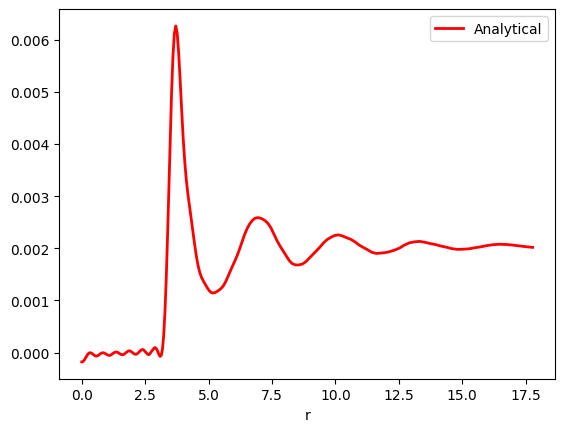

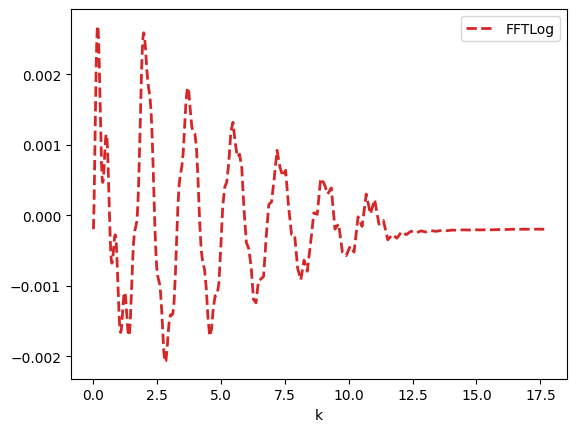

In [196]:
rmin = -8 ## log-base 10
rmax = 1.25 ## log-base 10
base = 10
N    = 1400  # number of points
μ    = 0.5  # Order mu of Bessel function

#################

def f1(x):
    """Analytical function: x^(mu+1) exp(-x^2/2)."""
    mu=0.5
    return x**(mu + 1)*np.exp(-x**2/2)

#################

r      = np.logspace(rmin, rmax, N, base=base)  # Input evaluation points
δ      = np.log(r[1]/r[0])      # Step size
offset = fft.fhtoffset( δ, initial=(rmin+rmax)*np.log(base), mu=μ )
k      = np.exp(offset)/np.flip(r)   # Output evaluation points

a_r = g(r) * (r/k)**(3/2) / (2*π)**3/2
fht = fft.fht(a_r, δ, mu=μ, offset=offset, bias=0.)

#a_k = f1(k)
#rel_err = abs((fht-a_k)/a_k)

plt.plot(r, a_r, 'r', lw=2, label='Analytical')
plt.legend()
plt.xlabel("r")
plt.show()

#plt.plot(k, a_k, 'k', lw=2, label='Analytical')
plt.plot(k, fht, 'C3--', lw=2, label='FFTLog')
plt.legend()
plt.xlabel("k")
plt.show()

In [189]:
(r*np.flip(k)), (offset), np.exp(offset)

(array([1.77920337e-05, 1.77920337e-05, 1.77920337e-05, ...,
        1.77920337e-05, 1.77920337e-05, 1.77920337e-05]),
 -10.93675974657682,
 1.7792033685968554e-05)

In [122]:
rmin = -7 ## base 10
rmax =  1 ## base 10
base = 10

np.logspace(rmin, rmax, 140, base=base), fft.fhtoffset(dln, initial=(rmin + rmax )*np.log(base), mu=mu)

(array([1.00000000e-07, 1.14170514e-07, 1.30349063e-07, 1.48820195e-07,
        1.69908782e-07, 1.93985730e-07, 2.21474506e-07, 2.52858582e-07,
        2.88689943e-07, 3.29598792e-07, 3.76304636e-07, 4.29628937e-07,
        4.90509567e-07, 5.60017294e-07, 6.39374624e-07, 7.29977296e-07,
        8.33418832e-07, 9.51518565e-07, 1.08635364e-06, 1.24029553e-06,
        1.41605179e-06, 1.61671361e-06, 1.84581024e-06, 2.10737104e-06,
        2.40599635e-06, 2.74693840e-06, 3.13619370e-06, 3.58060847e-06,
        4.08799910e-06, 4.66728959e-06, 5.32866852e-06, 6.08376825e-06,
        6.94586949e-06, 7.93013491e-06, 9.05387580e-06, 1.03368565e-05,
        1.18016423e-05, 1.34739957e-05, 1.53833301e-05, 1.75632271e-05,
        2.00520267e-05, 2.28935019e-05, 2.61376289e-05, 2.98414653e-05,
        3.40701543e-05, 3.88980704e-05, 4.44101269e-05, 5.07032702e-05,
        5.78881843e-05, 6.60912377e-05, 7.54567059e-05, 8.61493090e-05,
        9.83571091e-05, 1.12294817e-04, 1.28207570e-04, 1.463752

In [102]:
print( r[len(r)//2], r[(len(r))//2+1] )

j   = np.arange(len(r))
r_c = r[9] / np.exp( (9 - (len(r)-1)/2) * dln )
r_i = r_c * np.exp( (j - (len(r)-1)/2) * dln )
np.allclose( r_i , r )

0.0010685060324987059 0.001219918831012716


True

## $k_j$

In [103]:
i   = 39
k_i = 1/r[len(r)-1-i]
k_c = k_i/np.exp( (i - (len(r)-1)/2) * dln )

print(k_i)
k_j = k_c * np.exp( (j - (len(r)-1)/2) * dln )

k_j * np.flip(r_i)
#= k_c * np.exp( (j - (len(r)-1)/2) * dln )

17.56322708257542


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [114]:
k * np.flip(r), np.exp(offset), np.log(k_c) + np.log(r_c), offset

(array([9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.79391726e-07,
        9.79391726e-07, 9.79391726e-07, 9.79391726e-07, 9.793917

In [94]:
np.allclose( r[::-1], np.flip(r) )

True